<left><img src="http://3.bp.blogspot.com/-_ePv4W9Yz2o/U7rXyU1tP2I/AAAAAAAAU0U/h7JTvSwjxu8/s1600/woman+with+paycheck.png" style=" margin: 15px; height: 120px"></left>

# Predicting the salary of data scientists in the UK

## Introduction

In this project we set forth 3 goals:
   1. To scrub indeed.com for jobs related to data science in the UK
   2. To parse the resulting html for:
           a. Job title
           b. Company
           c. Location
           d. Salary (when available)
   3. To use this information to predict the salary band associated with a particular job.
   
   
 

<left><img src="http://cliparts101.com/files/269/C4A282518F5FF087708328848BEDE0B9/Excavation.png" style=" margin: 15px; height: 160px"></left>

## Scrubbing Indeed.com for job adverts

In this section we generate the url's associated with searching for data science jobs at various locations in the UK and use the requests library to get the raw html associated with each result. We save this to a local file for later use.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np

def plist(list_to_print = [], spacing = 14, col_num = 8, title = False):
        '''Prints a list in a pretty way'''
        list_items = [str(item).ljust(spacing) for item in list_to_print]
        if title:print(title+':\n{}'.format('_'*_chars_per_line))
        for i in range(0,len(list_to_print),col_num): 
            [print(list_items[j],end='') for j in range(i,i+col_num) if j < len(list_to_print)]
            print()
            
def findall(p, s):
    '''Yields all the positions of
    the pattern p in the string s.'''
    i = s.find(p)
    while i != -1:
        yield i
        i = s.find(p, i+1)

In [2]:
def getHTML(salary = 120,radius = 25, location = 'London', index = 0):
    url = '''https://www.indeed.co.uk/jobs?as_and=Data+Science&salary={}000&radius={}&l={}&start={}'''.format(salary,radius,location,index)
    rawHTML = requests.get(url).content
    return str(rawHTML)

#This function is just meant to be used to troubleshoot the getHTML function.
def getURL(salary = 120,radius = 25, location = 'London', index = 0):
    url = '''https://www.indeed.co.uk/jobs?as_and=Data+Science&salary={}000&radius={}&l={}&start={}'''.format(salary,radius,location,index)
    print (url)
    return url

In [3]:
#run this to get the full htmls of jobs 1-100 for salaries between 20k and 120k - London
'''for search_index in range(0,100,10):
    for search_salary in range(20,120,10):
        with open('../../../../Desktop/LondonHTML.csv', "a") as myfile:
            myfile.write(getHTML(salary = search_salary, index = search_index, location='London'))'''

#run this to get the full htmls of jobs 1-100 for salaries between 20k and 120k - Edinburgh
'''for search_index in range(0,100,10):
    for search_salary in range(20,120,10):
        with open('../../../../Desktop/EdinburghHTML.csv', "a") as myfile:
            myfile.write(getHTML(salary = search_salary, index = search_index, location='Edinburgh'))'''

#run this to get the full htmls of jobs 1-100 for salaries between 20k and 120k - Manchester
'''for search_index in range(0,100,10):
    for search_salary in range(20,120,10):
        with open('../../../../Desktop/ManchesterHTML.csv', "a") as myfile:
            myfile.write(getHTML(salary = search_salary, index = search_index, location='Manchester'))'''

#run this to get the full htmls of jobs 1-100 for salaries between 20k and 120k - Cambridge
'''for search_index in range(0,100,10):
    for search_salary in range(20,120,10):
        with open('../../../../Desktop/CambridgeHTML.csv', "a") as myfile:
            myfile.write(getHTML(salary = search_salary, index = search_index, location='Cambridge'))'''

#run this to get the full htmls of jobs 1-100 for salaries between 20k and 120k - Liverpool
'''for search_index in range(0,100,10):
    for search_salary in range(20,120,10):
        with open('../../../../Desktop/LiverpoolHTML.csv', "a") as myfile:
            myfile.write(getHTML(salary = search_salary, index = search_index, location='Liverpool'))'''
            
#run this to get the full htmls of jobs 1-100 for salaries between 20k and 120k - Oxford
'''for search_index in range(0,100,10):
    for search_salary in range(20,120,10):
        with open('../../../../Desktop/OxfordHTML.csv', "a") as myfile:
            myfile.write(getHTML(salary = search_salary, index = search_index, location='Oxford'))'''

#run this to get the full htmls of jobs 1-100 for salaries between 20k and 120k - Leeds
'''for search_index in range(0,100,10):
    for search_salary in range(20,120,10):
        with open('../../../../Desktop/LeedsHTML.csv', "a") as myfile:
            myfile.write(getHTML(salary = search_salary, index = search_index, location='Leeds'))'''
None

<left><img src="http://www.clker.com/cliparts/2/7/9/6/1195428842237753689johnny_automatic_look_it_up.svg" style=" margin: 15px; height: 120px"></left>

## Looking for meaningful information

Here we develop the process of finding the information we need by working with the search results from London. This is later applied to results from other cities.

In [4]:
def file_to_df(file):
    with open(file, "r") as myfile:
        m_html = myfile.read()
        soup = BeautifulSoup(m_html,'lxml')
    
    jobTitle = []
    loc_of_jt = []
    for i in findall('data-tn-element="jobTitle"',m_html): 
        loc_of_jt.append(i)

    for j in range(0,len(loc_of_jt)):
        jobTitle.append(BeautifulSoup(m_html[loc_of_jt[j]:loc_of_jt[j]+4500],"lxml").text.split('>')[1].split('\\n')[0])
    
    
    jobCompany = soup.find_all('span',{'class':'company'})
    jobCompany = [j.text.strip('\\n') for j in jobCompany]

    jobDescription = soup.find_all('td',{'class':'snip'})
    jobDescription = [j.text.strip('\\n') for j in jobDescription]
    jobDescription = [j[: j.find('window[')] for j in jobDescription]

    jobLocation = soup.find_all('span',{'class':'location'})
    jobLocation = [j.text.strip() for j in jobLocation]
    
    df = pd.DataFrame({'jobTitle':jobTitle,'jobCompany':jobCompany,
                       'jobDescription':jobDescription,'jobLocation':jobLocation})
    return df

In [5]:
Lo_data_frame = file_to_df('../../../../Desktop/LondonHTML.csv')

At this stage, we have a dataframe of 1500 jobs in the area of London.

In [6]:
Lo_data_frame.head()

,jobCompany,jobDescription,jobLocation,jobTitle
0,Booking.com,Actively contribute to taking Data Science at ...,London,Data Scientist - Machine Learning - Relocation...
1,"FTI Consulting, Inc.",Perform hands-on data remediation work on dive...,London EC1A,Technology - Information Governance & Complian...
2,Freelancer.com,"Data trumps opinions, every time. We currently...",London,Data Scientist
3,Cisco,"People, processes, data, and things. PhD in En...",London,Machine Learning Engineer
4,DataSine,"xc2\xa340,000 - \xc2\xa345,000 a year\n\n\nSci...",Shoreditch,Data Scientist


The next step is to find those with salary information. We do this by searching for the '\\xa3' string, since '\xa3' is the unicode for the '£' sign.

In [7]:
Lo_data_frame.applymap(lambda x: '\\xa3' in x).sum()

jobCompany          0
jobDescription    625
jobLocation         0
jobTitle           76
dtype: int64

To start with, let us extract the salary information when it is stored in the jobTitle field of a job listing.

In [8]:
xa3injobTitle = Lo_data_frame[Lo_data_frame['jobTitle'].apply(lambda x: '\\xa3' in x)]['jobTitle'].drop_duplicates()
xa3injobTitle.tolist()

['Junior Data Scientist - Up to \\xc2\\xa350,000 DOE - London',
 'Data Manager - \\xc2\\xa3450 per day Ltd Co - London',
 'Head of Marketing Sciences - Global Agency - c.\\xc2\\xa3100-\\xc2\\xa3150,000',
 'C# Quant Developer \\xc2\\xa6 Proprietary Trading Firm \\xc2\\xa6 \\xc2\\xa390k-\\xc2\\xa3110k',
 'Global Planning Director - Global Agency - c.\\xc2\\xa3150,000 + Bene...',
 'Planning Director - Global Agency - c.\\xc2\\xa3180,000 + Bonus + Ben...',
 'Python Developer - London - Big Data - \\xc2\\xa3700pd',
 'Account Director - Global Agency - c.\\xc2\\xa3180,000 + Bonus + Bene...',
 'Commercial Analytics Manager - to \\xc2\\xa3100,000',
 'Junior Data Analyst - Up to \\xc2\\xa350, 000 DOE - London']

In [9]:
def extract_salary_from_title(string):
    if 'per day' in string:
        return ('per_day', string.split(' per day')[0].split('\\xa3')[1])
    if 'DOE' in string:
        return ('DOE', string.split(' DOE')[0].split('\\xa3')[1])
    if '-\\xc2\\' in string:
        return ('range', (string.split('-\\xc2\\xa3')[0].split('\\xa3')[1],  string.split('-\\xc2\\xa3')[1]))
    salary = string.split('\\xa3')[1].split()[0]
    if 'pd' in salary:
        return ('per_day', salary.replace('pd',''))
    return ('per_year',salary)

In [10]:
xa3injobTitle.apply(extract_salary_from_title)

46                (DOE, 50,000)
77               (per_day, 450)
442     (range, (100, 150,000))
1028       (range, (90k, 110k))
1038        (per_year, 150,000)
1045        (per_year, 180,000)
1134             (per_day, 700)
1192        (per_year, 180,000)
1324        (per_year, 100,000)
1406             (DOE, 50, 000)
Name: jobTitle, dtype: object

Next, we extract any salary information from the job description.

In [11]:
xa3injobDescription = Lo_data_frame[Lo_data_frame['jobDescription'].apply(lambda x: '\\xa3' in x)]['jobDescription'].drop_duplicates()
xa3injobDescription.tolist()[42]

'xc2\\xa3120,000 a year\\n\\n\\nThought Leadership, Change Manager, PMP, PRINCE2, PMI, Data, Business Intelligence, Data Warehousing, Insight, Data Science, Analytics....\\n\\n\\n\\n Easily apply to this job\\n\\n\\n2 days ago   -  save job - more...'

In [12]:
def clean_tuple(pair):
    return (pair[0],pair[1].replace('\\','').replace('xa3','').replace('xc2',''))

def extract_salary_from_description(string):
    if ' a year' in string:
        return clean_tuple(('per_year',string.split(' a year')[0]))
    if ' DOE' in string:
        return clean_tuple(('DOE',string.split(' DOE')[0].split('Up to ')[1]))
    if ' a day' in string:
        return clean_tuple(('per_day',string.split(' a day')[0]))
    if ' a month' in string:
        return clean_tuple(('per_month',string.split(' a month')[0]))
    if '0pd' in string:
        return clean_tuple(('per_day',string.split('0pd')[0].split('\\xc2\\xa3')[1]+'0'))
    if ' an hour' in string:
        return clean_tuple(('per_hour',string.split(' an hour')[0]))

In [13]:
xa3injobDescription.apply(extract_salary_from_description)[0:4]

4      (per_year, 40,000 - 45,000)
7      (per_year, 50,000 - 60,000)
9      (per_year, 40,000 - 70,000)
10    (per_year, 80,000 - 100,000)
Name: jobDescription, dtype: object

Next we will work on integrating our newly obtained salary information into a new column of the data frame.

In [14]:
def try_except(x, f):
    try:
        return f(x)
    except:
        return np.nan

In [15]:
Example = Lo_data_frame.copy()
Example['salary_from_title'] = Example['jobTitle'].apply(lambda x: try_except(x, extract_salary_from_title))
Example['salary_from_description'] = Example['jobDescription'].apply(lambda x: try_except(x, extract_salary_from_description))

In [16]:
Example.iloc[45:52,:]

,jobCompany,jobDescription,jobLocation,jobTitle,salary_from_title,salary_from_description
45,"FTI Consulting, Inc.",Perform hands-on data remediation work on dive...,London EC1A,Technology - Information Governance & Complian...,NaN,None
46,Churchill Frank,Someone who is passionate about Big Data & Dat...,London,"Junior Data Scientist - Up to \xc2\xa350,000 D...","(DOE, 50,000)","(DOE, 50,000)"
47,EY,"Qualification in Computer Science, Operational...",London,Data Analytics - Senior Executive (Manager) - ...,NaN,None
48,Cisco,"People, processes, data, and things. PhD in En...",London,Machine Learning Engineer,NaN,None
49,babylo,Demonstrated commercial machine learning exper...,London SW3,Machine Learning Engineer,NaN,None
50,Wluper Ltd.,"xc2\xa350,000 - \xc2\xa360,000 a year\n\n\nBac...",London EC2A,Machine Learning/NLP Engineer,NaN,"(per_year, 50,000 - 60,000)"
51,Quantexa,"xc2\xa340,000 - \xc2\xa370,000 a year\n\n\nPro...",London,Data Scientist,NaN,"(per_year, 40,000 - 70,000)"


<left><img src="https://free.clipartof.com/1069-Free-Clipart-Of-A-Slide-Ruler.svg" style=" margin: 15px; height: 120px"></left>

## Making salaries comparable.

We are tasked with predicting the yearly salary band the job is most likely to fall within. To convert our salary information to a yearly estimate for the equivalent full time job we use the following somewhat ad-hoc conversion:

    - £X per hour  = (X*40*52) * 0.6 per year
    - £X per day  = (X*365) * 0.6 per year
    - £X per month  = (X*12) per year
    - £X DOE = X per year
    
The conversion factors were chosen so as to take into account the nature of contracting work.
    
Another issue is that several salaries are offered as a range. To safeguard applicants from unrealistic expectations we will keep only the lower bound of salary ranges as our estimate.

In [17]:
def convert_to_yearly_salary(pair):
    if pair == None or pair != pair: 
        return np.nan
    try:
        if type(pair[1]) == tuple:
            amount =  int(pair[1][0].replace(',','').replace('k','000').strip())
        else:
            amount = int(pair[1].replace(' ','').split('-')[0].replace(',','').replace('k','000'))
    except:
        return np.nan
    if pair[0] == 'per_year':
        return amount
    if pair[0] == 'per_month':
        return amount*12
    if pair[0] == 'per_day':
        return amount*365*0.6
    if pair[0] == 'DOE':
        return amount
    if pair[0] == 'per_hour':
        return amount*40*53*0.6

In [18]:
def get_salary_information(df):
    salary = pd.DataFrame()
    salary['from_title'] = df['jobTitle'].apply(lambda x: try_except(x, extract_salary_from_title))
    salary['from_description'] = df['jobDescription'].apply(lambda x: try_except(x, extract_salary_from_description))
    salary = salary.applymap(convert_to_yearly_salary)
    salray_info = salary.apply(lambda x:x['from_description'] 
                               if not np.isnan(x['from_description']) else x['from_title'], axis = 1)
    return pd.concat([df,salray_info],axis=1).rename(columns = {0:'jobSalary'})

<left><img src="http://sr.photos2.fotosearch.com/bthumb/CSP/CSP814/k19360116.jpg" style=" margin: 15px; height: 120px"></left>

## Bringing it all together.

In this section we use the functions built so far to obtain relevant job information for each city in our job search. At this time we are not seeking to use any non-salary related information from the job description in our model. For this reason we drop the job description field.

In [19]:
def data_from_file(file_name):
    df = file_to_df(file_name)
    df = get_salary_information(df).drop(['jobDescription'],axis=1)
    return df[['jobTitle','jobCompany','jobLocation','jobSalary']]

In [20]:
dataframes_by_city = [data_from_file('../../../../Desktop/{}HTML.csv'.format(city))
                              for city in ['London', 'Edinburgh', 'Leeds','Liverpool','Manchester']]

In [21]:
for df,city in zip(dataframes_by_city,['London', 'Edinburgh', 'Leeds','Liverpool','Manchester']):
    df['jobCity'] = city
    
df_of_all_jobs = pd.concat(dataframes_by_city,axis=0)
#df_of_all_jobs.to_csv('../../../../Desktop/multi_city_data.csv')

In [22]:
df_of_all_jobs.head()

,jobTitle,jobCompany,jobLocation,jobSalary,jobCity
0,Data Scientist - Machine Learning - Relocation...,Booking.com,London,NaN,London
1,Technology - Information Governance & Complian...,"FTI Consulting, Inc.",London EC1A,NaN,London
2,Data Scientist,Freelancer.com,London,NaN,London
3,Machine Learning Engineer,Cisco,London,NaN,London
4,Data Scientist,DataSine,Shoreditch,40000.0,London


<left><img src="http://azuarondesign.com/images/microscope-clipart-black-and-white-with-label-1.jpg" style=" margin: 15px; height: 120px"></left>

## Analyzing the data we have
Unfortunately, our 6800+ job listings are neither unique nor complete. In order to develop our model we need to obtain unique job listings with salary information.

In [2]:
jobs_dataframe = pd.read_csv('../../../../Desktop/multi_city_data.csv').drop(['Unnamed: 0'], axis = 1)
jobs_dataframe.head()

,jobTitle,jobCompany,jobLocation,jobSalary,jobCity
0,Data Scientist - Machine Learning - Relocation...,Booking.com,London,NaN,London
1,Technology - Information Governance & Complian...,"FTI Consulting, Inc.",London EC1A,NaN,London
2,Data Scientist,Freelancer.com,London,NaN,London
3,Machine Learning Engineer,Cisco,London,NaN,London
4,Data Scientist,DataSine,Shoreditch,40000.0,London


In [3]:
jobs_dataframe['jobSalary'].dropna().describe()

count      2050.000000
mean      74883.553659
std       35417.205159
min          50.000000
25%       45690.000000
50%       75000.000000
75%       98550.000000
max      164250.000000
Name: jobSalary, dtype: float64

By looking at this we can see that some of the salary information was truncated. For example:
    
    50,000 bacame 50 and 30,000 became 300
    
This is due to the character limit in the indeed.com job description field.

We resolve this by multiplying all salaries bellow 10k a year by 10 until they become reasonable (i.e. larger than 10k a year).

In [4]:
def make_at_least_10k(x):
    while x<10000:
        x = 10*x
    return x

jobs_dataframe['jobSalary'] = jobs_dataframe['jobSalary'].apply(make_at_least_10k)

This results in a much more reasonable minimum of 15k a year.

In [5]:
jobs_dataframe['jobSalary'].describe()

count      2050.000000
mean      75824.931707
std       34052.154285
min       15264.000000
25%       47725.000000
50%       75000.000000
75%       98550.000000
max      164250.000000
Name: jobSalary, dtype: float64

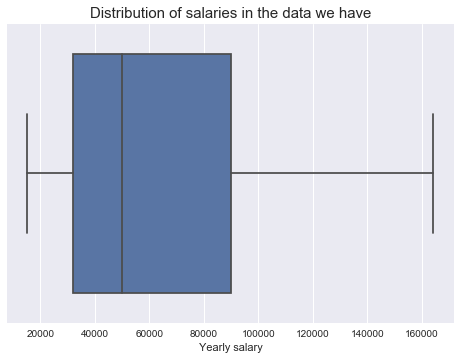

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(jobs_dataframe.drop_duplicates()['jobSalary'].dropna())
plt.title('Distribution of salaries in the data we have',size = 15)
plt.xlabel('Yearly salary')
plt.show()

As indicated by our boss, we will try to predict the salary range of any particular job.

The salary ranges we will consider are:

        0: 0 to 25k
        1: 25k to 35k
        2: 35k to 50k
        3: 50k to 75k
        4: 65k to 75k
        5: 75k+

In [8]:
jobs_dataframe['jobSalaryBand'] = jobs_dataframe['jobSalary'].apply(lambda x: np.nan if x!= x else 
                                                                    0 if x<25000 else
                                                                    1 if x<35000 else
                                                                    2 if x<50000 else
                                                                    3 if x<65000 else
                                                                    4 if x<75000 else 5)
jobs_dataframe.head()

,jobTitle,jobCompany,jobLocation,jobSalary,jobCity,jobSalaryBand
0,Data Scientist - Machine Learning - Relocation...,Booking.com,London,NaN,London,NaN
1,Technology - Information Governance & Complian...,"FTI Consulting, Inc.",London EC1A,NaN,London,NaN
2,Data Scientist,Freelancer.com,London,NaN,London,NaN
3,Machine Learning Engineer,Cisco,London,NaN,London,NaN
4,Data Scientist,DataSine,Shoreditch,40000.0,London,2.0


Unfortunately we only have 480 non-duplicate jobs with salary information. We will seek to build a predictive model on this data.

In [9]:
jobs_dataframe.drop_duplicates().dropna().shape

(480, 6)

For the amount of data we have (480 records), we can not afford to have too much granularity in our attributes. Due to this, we will use only the city name, and the top 50 words present in the job title (according to the intensity of the correlation between their inclusion and the job's salary) as our features in our predictive model.

An interesting problem we've encountered is that if we drop too much information, we end up getting very few unique rows. But if we keep enough information to distinguish all 480 entries for which we have salary information, we end up with close to 500 columns! In the end we find a compromise: 56 features which allow us to distinguish between 335 distinct job listings.

In [10]:
boring_words = ['','of','and','in','an','\\xc2\\xa360k',
                '\\xe2\\x80\\x93','\\xc2\\xa350000','\\xc2\\xa3450',
                'per','day','for','6','c.\\xc2\\xa3100-\\xc2\\xa3150000',
                'c.\\xc2\\xa3150000','/','|','\\xc2\\xa390k-\\xc2\\xa3110k',
                'c.\\xc2\\xa3180000','c.\\xc2\\xa3180000','\\xc2\\xa6','\\xc2\\xa35',
                '\\xe2\\x80\\x94','//','\\xc2\\xa3700pd','\\xc2\\xa3100000','\\xc2\\xa350',
                '12','hi','it','g7','3rd','5982','448','8','47779','\\xc2\\xa350-60k','9',
                '11','16585','9992','700pd','2','year']

def words_in_pandas_series(series):
    all_text = ' '
    for string in series:
        all_text += string + ' '
    words = [text.replace(',','').replace('(','').replace(')','').replace('...','').lower() 
            for text in all_text.split() 
            if text not in ['-','to','&','|...','/']]
    return [word for word in words if word not in boring_words]

words = words_in_pandas_series(jobs_dataframe.dropna()['jobTitle'].drop_duplicates())

#this generates a list of words present in the job description.
words = [word.split('//')[0].split('\\xc2')[0].split('\\xe2')[0].strip('-').strip('/') for word in words]

key_words = pd.Series(words).unique()

In [11]:
correlation_of_words_with_salary = pd.DataFrame()

for word in key_words:
    correlation_of_words_with_salary[word] = jobs_dataframe['jobTitle'].apply(lambda x: 1 if word in x.lower() else 0)

correlation_of_words_with_salary['Target'] = jobs_dataframe['jobSalaryBand']

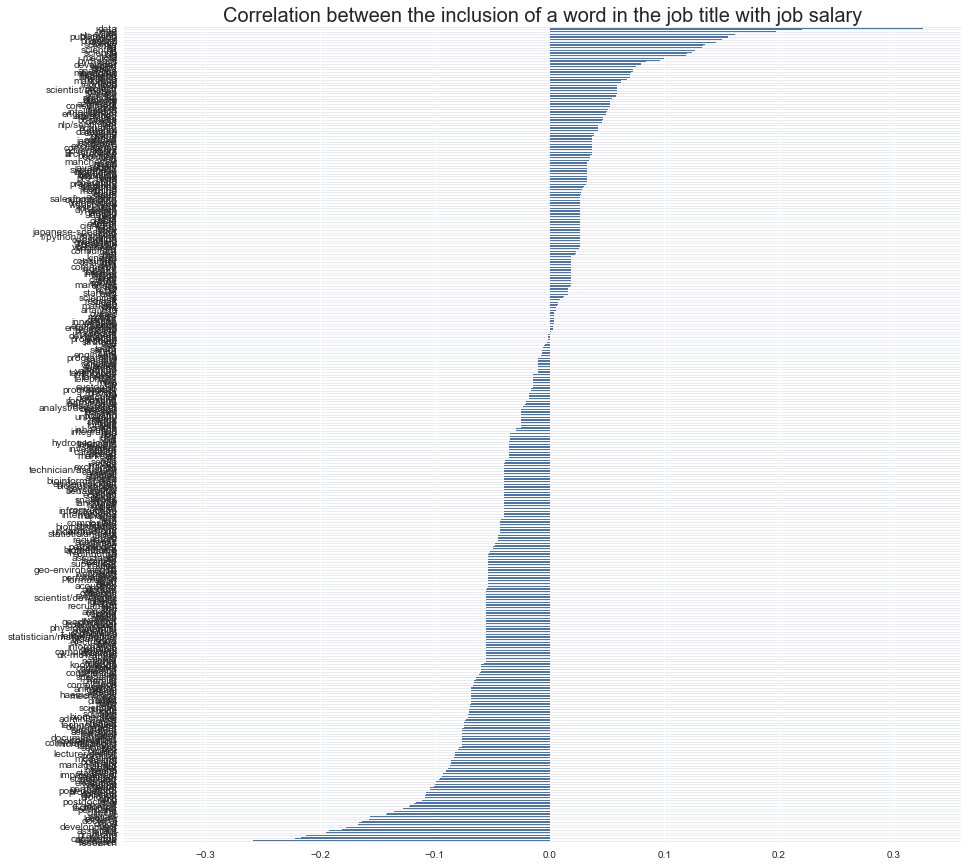

In [23]:
plt.figure(figsize=(15,15))
word_corr = correlation_of_words_with_salary.dropna().corr()['Target'].iloc[:-1].sort_values()
word_corr.plot(kind = 'barh')
plt.title('Correlation between the inclusion of a word in the job title with job salary',size = 20)
plt.show()

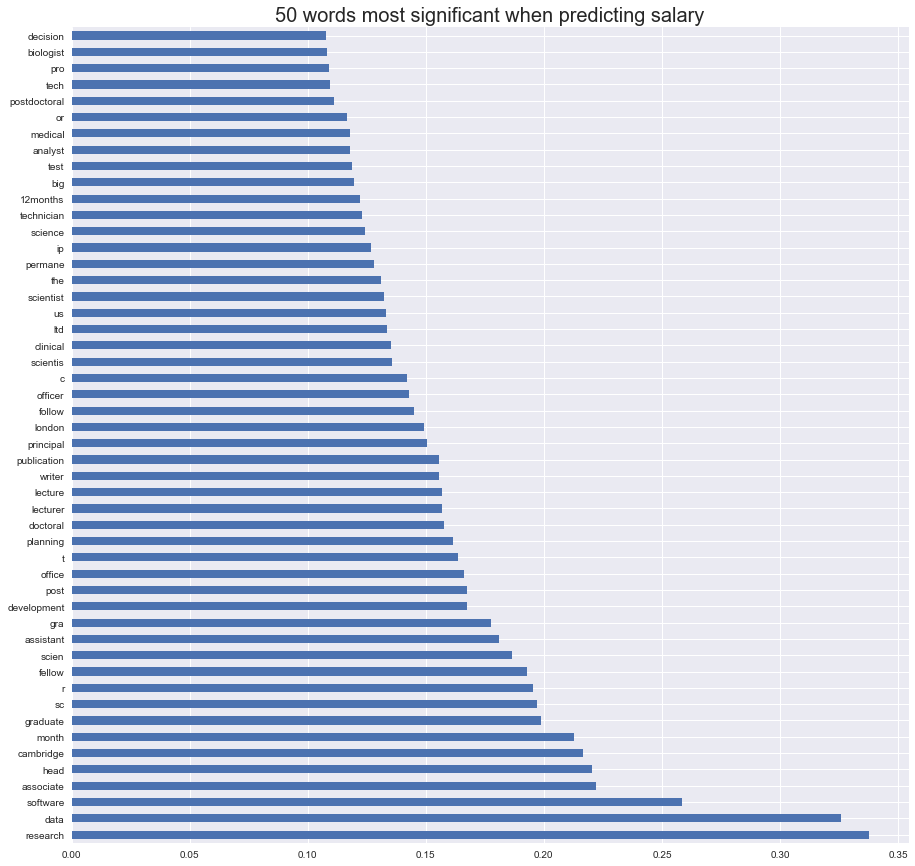

In [26]:
plt.figure(figsize=(15,15))
most_important_words = word_corr.apply(np.abs).sort_values(ascending=False).iloc[0:50]
most_important_words.plot(kind = 'barh')
plt.title('50 words most significant when predicting salary', size= 20)
plt.show()

In [27]:
df = pd.DataFrame()
for word in most_important_words.keys():
    df[word] = jobs_dataframe['jobTitle'].apply(lambda x: 1 if word in x.lower() else 0)

for city in ['London', 'Edinburgh', 'Leeds', 'Liverpool', 'Manchester']:
    df[city] = jobs_dataframe['jobCity'].apply(lambda x: 1 if x == city else 0)

df['SalaryBand'] = jobs_dataframe['jobSalaryBand']

In [28]:
df.dropna().drop_duplicates().shape

(335, 56)

<left><img src="http://images.clipartpanda.com/clay-art-clipart-52566_clay_bowl_lg.gif" style=" margin: 15px; height: 120px"></left>


## Modeling

In this section we use Logistic Regression to predict the most likely salary band associated to a particular job.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X = df.dropna().drop_duplicates()[[col for col in df if col != 'SalaryBand']]
y = df.dropna().drop_duplicates()['SalaryBand']

Since this is a classification problem, our first goal is to find the baseline accuracy.

In [30]:
y.value_counts()

5.0    98
1.0    85
2.0    62
3.0    41
0.0    33
4.0    16
Name: SalaryBand, dtype: int64

In [31]:
print('The baseline is:',round(98/335,3))

The baseline is: 0.293


Given our small amount of data, it is tractable to examine several combinations of models and parameters.

In [32]:
logreg_params = {'C':np.logspace(-4,4,91), 'penalty':['l1','l2']}
logreg = LogisticRegression()

gs_logreg = GridSearchCV(logreg,param_grid=logreg_params,cv = 3,n_jobs=1, verbose=0)
gs_logreg.fit(X,y)
gs_logreg.best_estimator_.score(X,y)

0.54626865671641789

In [33]:
gs_logreg.best_estimator_

LogisticRegression(C=0.069894732072734861, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [34]:
coef_df = pd.DataFrame({'coef':gs_logreg.best_estimator_.coef_[0]}).T
coef_df.columns = X.columns
coef_df

,research,data,software,associate,head,cambridge,month,graduate,sc,r,...,postdoctoral,tech,pro,biologist,decision,London,Edinburgh,Leeds,Liverpool,Manchester
coef,-0.122301,-0.280088,-0.170813,-0.050413,-0.104308,-0.025443,-0.062275,0.397881,-0.261716,-0.3964,...,-0.033819,-0.043159,0.117887,0.05901,-0.060861,-0.597439,-0.025149,-0.117692,0.190778,-0.085716


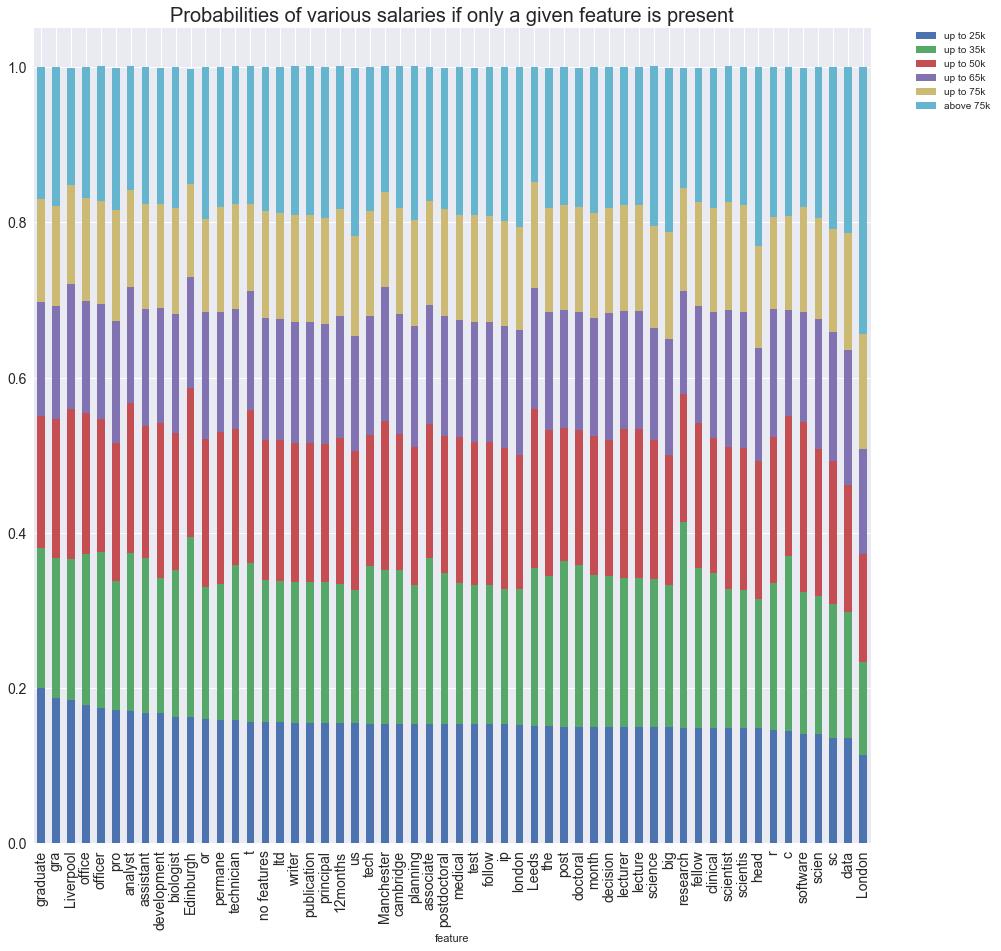

In [35]:
Z = pd.DataFrame(np.zeros(55)).T

most_likely = pd.DataFrame(list(zip(X.columns,gs_logreg.predict_proba(np.identity(55)))))
most_likely = pd.concat([pd.DataFrame(list(zip(['no features'],gs_logreg.predict_proba(Z)))),most_likely])
most_likely['up to 25k'] = most_likely[1].apply(lambda x:x[0])
most_likely['up to 35k'] = most_likely[1].apply(lambda x:x[1])
most_likely['up to 50k'] = most_likely[1].apply(lambda x:x[2])
most_likely['up to 65k'] = most_likely[1].apply(lambda x:x[3])
most_likely['up to 75k'] = most_likely[1].apply(lambda x:x[4]) 
most_likely['above 75k'] = most_likely[1].apply(lambda x:x[5]) 
most_likely = most_likely.applymap(lambda x:round(x,3) if type(x) == float else x)
most_likely = most_likely.drop(1, axis=1).rename(columns={0:'feature'})

most_likely=most_likely.sort_values(['up to 25k','up to 35k','up to 50k','up to 65k','up to 75k'],ascending = False)

most_likely.plot(kind = 'bar',stacked = True, 
                 x = 'feature',figsize=(15,15),
                 fontsize= 14, legend='white')
plt.title('Probabilities of various salaries if only a given feature is present',size =20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [46]:
most_likely.head()

,feature,up to 25k,up to 35k,up to 50k,up to 65k,up to 75k,above 75k
7,graduate,0.200,0.180,0.171,0.146,0.133,0.170
13,gra,0.187,0.180,0.180,0.145,0.129,0.179
53,Liverpool,0.185,0.181,0.194,0.161,0.127,0.151
16,office,0.178,0.194,0.182,0.145,0.132,0.169
27,officer,0.174,0.201,0.172,0.148,0.133,0.173


In [47]:
from sklearn.metrics import confusion_matrix

confusion_m = pd.DataFrame(confusion_matrix(y, gs_logreg.best_estimator_.predict(X)))
confusion_m.index = ['true 0','true 1','true 2','retrue 3','true 4', 'true 5']
confusion_m.columns = ['pred 0','pred 1','pred 2','pred 3','pred 4','pred 5']
confusion_m

,pred 0,pred 1,pred 2,pred 3,pred 4,pred 5
true 0,7,22,2,1,0,1
true 1,0,71,6,2,0,6
true 2,1,35,13,4,0,9
retrue 3,0,22,3,3,0,13
true 4,0,5,0,0,0,11
true 5,0,5,2,2,0,89


In [48]:
#salaries estimated above their true value
count = 0
for i in range(0,6):
    for j in range(i+1,6):
        count += confusion_m.iloc[i,j]
count

77

In [49]:
#salaries estimated bellow their true value
count = 0
for i in range(0,6):
    for j in range(0,i):
        count += confusion_m.iloc[i,j]
count

75

As we can see in the confusion matrix, our model has been moderately accurate, somewhat improving upon the baseline accuracy of 29% with an accuracy of 54%. However our model has failed to correctly classify 142 jobs. Worse still, it has predicted 77 of these jobs to have a salary above their true salary.


# Non Technical Report
## On the prediction of probable salaries for job listings.

As we are all aware, our contracting firm is expanding at a tremendous pace, and the task of estimating the probable salary of a particular job has placed a great strain on our human resources. As requested, I have used machine learning to build a model that - given a job title and job location - will output a crude prediction of the salary a candidate might be offered if their application is successful.

The information we used to develop this model was obtained by scouring through 6800+ job listings for Data Scientist posted at Indeed.com, corresponding to the cities of London, Liverpool, Leeds, Manchester and Edinburgh. However, only 480 job listings included salary information, and thus we were not able to make any use of the other 6300+ jobs we found.

This lack of salary information was by far the biggest obstacle in our task. Without a larger amount of data with which to calibrate our model, subtle differences between job listings could not be explored without sacrificing having a useful model capable of reasonably accurate predictions on new data. In the end our model is able recognize 50 carefully selected words from a job's title, together with the job's city, to predict whether a candidate will be offered a yearly salary in the range of:
    
     0 to 25k
     25k to 35k
     35k to 50k
     50k to 75k
     65k to 75k
     75k+
    
In doing so our model predicts the correct salary bracket in approximately 54.6% of the data - a significant improvement on merely assuming all jobs land within the most common salary range (75k+), which would have resulted in 29% accuracy. Due to our rigorous process of testing, we expect the model to retain this performance when exposed to new data.

Two avenues of improvement are available at this time: to increase the accuracy of the model, and to increase the specificity of the predictions. For either, we would request additional resources - such as an exprienced member of our firm - to help us to manually estimate salaries for more jobs. With sufficient data we could look into the subtle differences between job listings, such as the inclusion of other words in the title, the specific location within each city, and even the content of the job description.